# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math, random, os

# Change Directory

In [ ]:
dataset_dir = '/content/drive/MyDrive/Colab Datasets/MNIST/'
os.chdir(dataset_dir)

# Reading The Train & Test Sets

In [ ]:
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
  image = np.zeros((784, 1))
  for i in range(784):
    image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
  
  label_value = int.from_bytes(train_labels_file.read(1), 'big')
  label = np.zeros((10, 1))
  label[label_value, 0] = 1
  
  train_set.append((image, label))

In [ ]:
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
  image = np.zeros((784, 1))
  for i in range(784):
    image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
  
  label_value = int.from_bytes(test_labels_file.read(1), 'big')
  label = np.zeros((10, 1))
  label[label_value, 0] = 1
  
  test_set.append((image, label))

In [ ]:
def show_image(img):
  image = np.zeros((28, 28))
  for i in range(28):
    for j in range(28):
      image[i, j] = img[i * 28 + j]
  plt.imshow(image, 'gray')

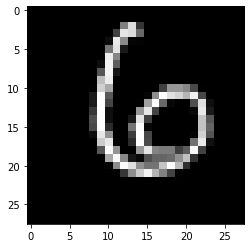

In [ ]:
show_image(test_set[100][0])

# Weights & Biases Initialization

In [ ]:
def init(c, r):
  weight = np.random.normal(0, 2/r, size=(c, r))
  bias = np.zeros((c, 1))

  return weight, bias

In [ ]:
def pprint(weight, bias):
  np.set_printoptions(suppress=True, formatter={'float': '{: 0.3f}'.format})
  print('='*80)

  print(f'[#] Weight\n{weight.shape}\n{weight}\n')
  print(f'[#] Biases\n{bias.shape}\n{bias}\n')

  print('='*80)

pprint(np.random.normal(0, 1, size=(10, 10)), np.zeros((10, 1)))

[#] Weight
(10, 10)
[[-1.075 -0.288  0.274 -0.290 -0.992 -0.604  1.461  0.648  1.316  0.489]
 [ 0.259  1.141 -1.369  0.503  0.078  0.158  1.151 -0.662 -0.521 -0.642]
 [ 0.840  0.855  0.563  0.119  0.854  1.749  1.355  0.595  0.434 -1.994]
 [ 0.573 -0.968  0.074  1.302 -0.760  1.086  1.844  0.044  0.007 -0.325]
 [ 0.653 -0.178  0.719 -1.132 -0.948  1.227 -0.339  2.088  0.306  0.967]
 [-0.274 -0.006  0.142  1.313 -0.398  0.575 -0.505 -1.000  1.291  2.036]
 [ 0.003 -0.607  0.021  0.184 -1.296 -0.872 -0.667 -1.617  0.696  1.584]
 [-0.179  0.951 -0.389  0.269 -0.055  1.052  0.601 -0.413 -0.542 -0.251]
 [-0.446  0.047 -0.466  1.628  1.010  1.420  0.094  1.828 -0.822 -1.613]
 [ 0.550  0.338  2.113 -1.231  0.181  0.369  0.857 -1.494 -0.819 -0.272]]

[#] Biases
(10, 1)
[[ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]]



In [ ]:
# layer 1
W1, b1=init(16, 28*28)
# layer 2
W2, b2=init(16, 16)
# layer 3
W3, b3=init(10, 16)

# Plotting Weights and Biases

In [ ]:
pprint(W1, b1)
pprint(W2, b2)
pprint(W3, b3)

[#] Weight
(16, 784)
[[-0.003 -0.004 -0.001 ...  0.003  0.001  0.003]
 [-0.003  0.000  0.001 ... -0.001 -0.001  0.001]
 [ 0.004 -0.004 -0.001 ...  0.002 -0.000  0.001]
 ...
 [-0.004  0.003  0.001 ... -0.000 -0.003  0.001]
 [ 0.000 -0.002  0.001 ...  0.002 -0.005 -0.001]
 [-0.001 -0.003 -0.000 ...  0.002 -0.001  0.001]]

[#] Biases
(16, 1)
[[ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]]

[#] Weight
(16, 16)
[[ 0.360 -0.211 -0.109 -0.049  0.036 -0.015  0.179  0.124 -0.065 -0.033
  -0.251  0.215  0.028  0.089 -0.096 -0.106]
 [-0.044 -0.002 -0.155 -0.073  0.051 -0.046 -0.028 -0.177  0.016 -0.064
   0.099  0.085 -0.104 -0.132  0.005  0.076]
 [ 0.018 -0.022 -0.020 -0.184 -0.090 -0.080  0.067  0.112 -0.075 -0.267
  -0.042  0.195 -0.022  0.233  0.058 -0.225]
 [ 0.076  0.088  0.133 -0.070 -0.059 -0.124  0.068 -0.047  0.255 -0.050
  -0.039  0.058  0.016  0.206  0.123  0.088]
 [ 0.021 

# Activation & Cost Function

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
def d_sigmoid(x):
  s = sigmoid(x) 
  return s * (1 - s)

In [ ]:
def cost(exp, pred):
  cost = 0
  for i in range(10):
    cost += (exp[i] - pred[i]) ** 2
  return cost

# Hyperparameters

In [ ]:
batch_size = 50
epochs = 5
alpha = 1

# Gradients

In [ ]:
def gradient(c, r):
  return np.zeros((c, r))

def get_gradients():
  return gradient(16, 28*28), gradient(16, 1), gradient(16, 16), gradient(16, 1), gradient(10, 16), gradient(10, 1)

# Initialization

In [ ]:
def get_neurons(image_set, image_index):  
  return image_set[image_index][0], np.zeros((1, 16)), np.zeros((1, 16)), np.zeros((1, 10))

In [ ]:
def get_sigmoids():
  return np.zeros((16, 1)), np.zeros((16, 1)), np.zeros((10, 1))

# Feed Forward & Back Propagation

In [ ]:
def feed_forward():
  global a0, a1, a2, a3
  global z1, z2, z3
  global y
  global W1, b1, W2, b2, W3, b3

  # Layer 1  
  z1 = W1 @ a0 + b1
  a1 = sigmoid(z1)
  # Layer 2
  z2 = W2 @ a1 + b2
  a2 = sigmoid(z2)
  # Layer 3
  z3 = W3 @ a2 + b3
  a3 = sigmoid(z3)

In [ ]:
def backpropagation():
  global a0, a1, a2, a3
  global z1, z2, z3
  global y
  global W1, b1, W2, b2, W3, b3
  global grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3

  # Layer 3
  grad_W3 += (2 * d_sigmoid(z3) * (a3 - y)) @ (np.transpose(a2))
  grad_b3 += 2 * d_sigmoid(z3) * (a3 - y)
  grad_a2 = np.transpose(W3) @ (2 * d_sigmoid(z3) * (a3 - y))
  # Layer 2
  grad_W2 += (d_sigmoid(z2) * grad_a2) @ (np.transpose(a1))
  grad_b2 += d_sigmoid(z2) * grad_a2
  grad_a1 = np.transpose(W2) @ (d_sigmoid(z2) * grad_a2)
  # Layer 1
  grad_W1 += (d_sigmoid(z1) * grad_a1) @ (np.transpose(a0))
  grad_b1 += d_sigmoid(z1) * grad_a1

# Updating Weights & Biases

In [ ]:
def update():
  global W3, b3, W2, b2, W1, b1

  # Weight and Bias 3
  W3 = W3 - alpha * (grad_W3 / batch_size)
  b3 = b3 - alpha * (grad_b3 / batch_size)
  # Weight and Bias 2
  W2 = W2 - alpha * (grad_W2 / batch_size)
  b2 = b2 - alpha * (grad_b2 / batch_size)
  # Weight and Bias 1
  W1 = W1 - alpha * (grad_W1 / batch_size)
  b1 = b1 - alpha * (grad_b1 / batch_size)


# Training

In [ ]:
num_samples = len(train_set)

avg_costs = []
accuracy_list = []
for epoch in range(epochs):

  print('epoch number:', epoch)
  # shuffling the train set
  random.shuffle(train_set)

  sum_cost = 0
  true_positive = 0
  num_of_images = 0
  for batch_number in range(num_samples // batch_size):
    grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3 = get_gradients()
      
    for image_index in range(batch_number * batch_size, (batch_number + 1) * batch_size):
      a0, a1, a2, a3 = get_neurons(train_set, image_index)
      z1, z2, z3 = get_sigmoids()
      y = train_set[image_index][1]

      feed_forward()

      sum_cost += cost(a3, y)

      backpropagation()

      if np.argmax(a3) == np.argmax(y):
        true_positive += 1
      num_of_images += 1
  
    # updating weights and biases
    update()

  # recording average cost in the current step
  avg_costs.append(sum_cost / num_samples)

  # print epochs info
  accuracy = true_positive/num_of_images
  accuracy_list.append(accuracy)
  print(f' - [*] For {epoch}th epoch: train accuracy: {true_positive}/{num_of_images} = {accuracy*100:.2f}')

epoch number: 0
 - [*] For 0th epoch: train accuracy: 22393/60000 = 37.32
epoch number: 1
 - [*] For 1th epoch: train accuracy: 53000/60000 = 88.33
epoch number: 2
 - [*] For 2th epoch: train accuracy: 55033/60000 = 91.72
epoch number: 3
 - [*] For 3th epoch: train accuracy: 55687/60000 = 92.81
epoch number: 4
 - [*] For 4th epoch: train accuracy: 56092/60000 = 93.49


# Average Cost

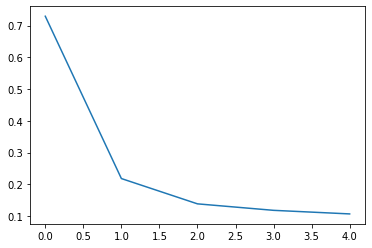

In [ ]:
plt.plot(avg_costs)
plt.show()

# Accuracy Plot

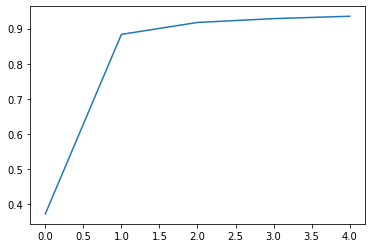

In [ ]:
plt.plot(accuracy_list)
plt.show()

# Evaluating The Network

In [ ]:
def evaluate(image_set):
  global a0, a1, a2, a3
  global y_actual, y_pred
  global true_positive

  for j in range(10):
    if (image_set[i][1])[j] == 1:
      y_actual = j
      break
          
  for j in range(1, 10):
    if a3[j, 0] > a3[y_pred, 0]:
      y_pred = j

  if y_pred == y_actual:
    true_positive += 1

In [ ]:
true_positive = 0

for i in range(num_of_train_images):
  a0, a1, a2, a3 = get_neurons(train_set, i)
  z1, z2, z3 = get_sigmoids()
  y = train_set[i][1]

  feed_forward()
  
  y_actual = -1
  y_pred = 0
  evaluate(train_set)
    
succes_rate = true_positive / num_of_train_images
print(f'{true_positive}, {num_of_train_images}')
print(f'Train Accuracy = {succes_rate*100:.2f}%')

56445, 60000
Train Accuracy = 94.08%


In [ ]:
true_positive = 0

for i in range(num_of_test_images):
  a0, a1, a2, a3 = get_neurons(test_set, i)
  z1, z2, z3 = get_sigmoids()

  feed_forward()
    
  y_actual = -1
  y_pred = 0
  evaluate(test_set)
    
succes_rate = true_positive / num_of_test_images
print(f'{true_positive}, {num_of_test_images}')
print(f'Test Accuracy = {succes_rate*100:.2f}%')

9313, 10000
Test Accuracy = 93.13%
